In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_index= pd.read_excel(r"datasets/CSI300_Index_Level(2008-3-31).xlsx")
#delete row 0 1 2
df_index.drop([0,1,2],inplace=True)
df_index.head()
#change column name to Date and Index_Level
df_index.columns=['date','index_level']
#sort by date
df_index.sort_values(by='date',ascending=True,inplace=True)
#drop index 3595,3594
df_index.drop([3595,3594],inplace=True)
df_index


,date,index_level
3593,2008-03-31,3790.53
3592,2008-04-01,3582.86
3591,2008-04-02,3547.98
3590,2008-04-03,3650.7
3589,2008-04-07,3845.82
...,...,...
7,2022-12-26,3843.49
6,2022-12-27,3887.85
5,2022-12-28,3871.26
4,2022-12-29,3856.7


In [3]:
df_index['date']=pd.to_datetime(df_index['date'])
df_index.set_index("date", inplace=True)
quarter_groups=df_index.groupby(pd.Grouper(freq='Q'))
#find the last day of each week
df_index_quarter=quarter_groups.last()
df_index_quarter.dropna(inplace=True)

In [4]:
df_index_quarter['quarter'] = range(1, len(df_index_quarter) + 1)
df_index_quarter.set_index("quarter", inplace=True)
df_index_quarter

,index_level
quarter,
1,3790.53
2,2791.82
3,2243.66
4,1817.72
5,2507.79
6,3166.47
7,3004.81
8,3575.68
9,3345.61


In [5]:
#last 4 quarters' max value for weekly_indexLevel Dataset
df_index_quarter['max_4'] = None
for i in range(5, len(df_index_quarter)+1):
    previous_4 = df_index_quarter.loc[i-4:i-1, 'index_level']  
    max_value = previous_4.max()  
    df_index_quarter.at[i, 'max_4'] = max_value  

df_index_quarter

,index_level,max_4
quarter,,
1,3790.53,None
2,2791.82,None
3,2243.66,None
4,1817.72,None
5,2507.79,3790.53
6,3166.47,2791.82
7,3004.81,3166.47
8,3575.68,3166.47
9,3345.61,3575.68


In [6]:
#calculate ML = index_level/(max of last 4 quarters) and create a new column
df_index_quarter['ML'] = df_index_quarter['index_level']/df_index_quarter['max_4']
df_index_quarter

,index_level,max_4,ML
quarter,,,
1,3790.53,None,NaN
2,2791.82,None,NaN
3,2243.66,None,NaN
4,1817.72,None,NaN
5,2507.79,3790.53,0.661593
6,3166.47,2791.82,1.134196
7,3004.81,3166.47,0.948946
8,3575.68,3166.47,1.129232
9,3345.61,3575.68,0.935657


In [7]:
#find the mean and standard deviation of ML for past 12 months
df_index_quarter['mean_4'] = None
df_index_quarter['std_4'] = None
for i in range(9, len(df_index_quarter)+1):
    previous_4 = df_index_quarter.loc[i-4:i-1, 'ML']  
    mean_value = previous_4.mean()  
    std_value = previous_4.std()  
    df_index_quarter.at[i, 'mean_4'] = mean_value  
    df_index_quarter.at[i, 'std_4'] = std_value

df_index_quarter

,index_level,max_4,ML,mean_4,std_4
quarter,,,,,
1,3790.53,None,NaN,None,None
2,2791.82,None,NaN,None,None
3,2243.66,None,NaN,None,None
4,1817.72,None,NaN,None,None
5,2507.79,3790.53,0.661593,None,None
6,3166.47,2791.82,1.134196,None,None
7,3004.81,3166.47,0.948946,None,None
8,3575.68,3166.47,1.129232,None,None
9,3345.61,3575.68,0.935657,0.968492,0.222009


In [8]:
df_index_quarter['mean-1.5*std'] = df_index_quarter['mean_4'] - 1.5*df_index_quarter['std_4']
df_index_quarter

,index_level,max_4,ML,mean_4,std_4,mean-2.5*std
quarter,,,,,,
1,3790.53,None,NaN,None,None,NaN
2,2791.82,None,NaN,None,None,NaN
3,2243.66,None,NaN,None,None,NaN
4,1817.72,None,NaN,None,None,NaN
5,2507.79,3790.53,0.661593,None,None,NaN
6,3166.47,2791.82,1.134196,None,None,NaN
7,3004.81,3166.47,0.948946,None,None,NaN
8,3575.68,3166.47,1.129232,None,None,NaN
9,3345.61,3575.68,0.935657,0.968492,0.222009,0.41347


In [9]:
CCt = -1
df_index_quarter['CCt'] = None
for i in range(4+4, len(df_index_quarter)+1):
    previous_4 = df_index_quarter.loc[i-4:i-1, 'ML'] 
    ML_mean =  previous_4.mean()  
    ML_sd = previous_4.std()
    if df_index_quarter['ML'][i] < ML_mean - 1.5*ML_sd:
        CCt = 1

    else:
        CCt = 0

    df_index_quarter.at[i, 'CCt'] = CCt

In [10]:
#to csv
df_index_quarter.to_csv(r'1.5_CSI300_IL_quarter_ML.csv', index = True, header=True)

In [11]:
df_index_quarter.describe()

,index_level
count,60.000000
mean,3374.879833
std,849.842881
min,1817.720000
25%,2553.040000
50%,3327.845000
75%,3871.807500
max,5224.040000


In [12]:
df_index_quarter["CCt"].describe()

count     53
unique     2
top        0
freq      40
Name: CCt, dtype: int64

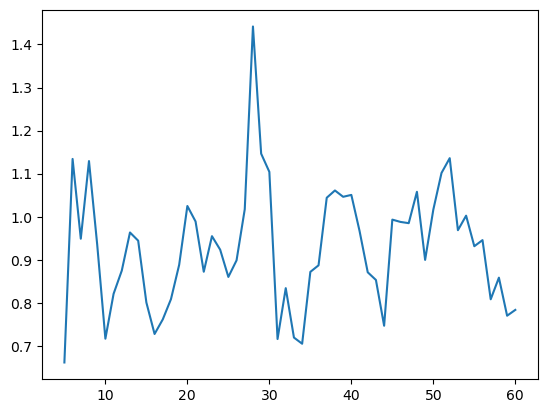

In [13]:
ypoints = df_index_quarter['ML']
plt.plot(ypoints)

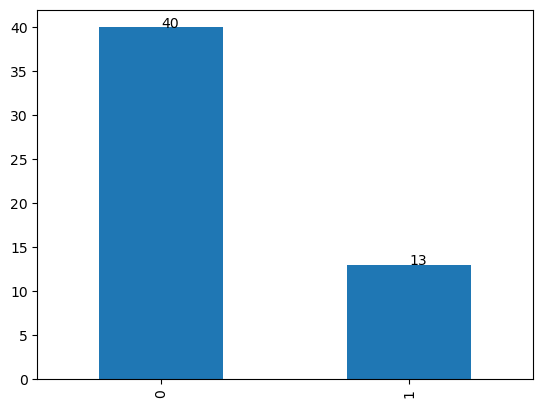

In [14]:
df_index_quarter['CCt'].value_counts().plot(kind='bar')
for index, value in enumerate(df_index_quarter['CCt'].value_counts()):
    plt.text(index, value, str(value))

plt.show()